# Introduction  

This example shows how to plot a composition for data that is changing over time when there are only a small number of time periods.  Two plots will be created.

- **A Stacked Column Chart to show relative and absolute differences between groups.  This chart also allows us to easily compare group totals.**
- **A 100% Stacked Column Chart to show relative differences between groups.** 

### Objectives

The example uses yearly data on hospital acquired infections.  Infection data from two hospitals is compared over 3 years.  We want to:

- **Load the data from a file into memory**
- **Explore the data as to understand what it contains and how it is organized**
- **Choose the data we want to plot**
- **Choose an appropriate type of plot**
- **Plot the data**

### Importing Modules

In this example we need extra functionality for plotting (matplotlib), math (numpy) and data handling (pandas).

In [1]:
%matplotlib inline
from matplotlib import pylab as plt
import numpy as np
import pandas as pd  


First we read the data using the `Pandas` library.  The pandas `read_csv` function reads the data from the file and places it in an appropriate data structure.  If we are new to a library like `Pandas` then after we call a function it is useful to print the return type.

In [2]:
df = pd.read_csv("Hospital-Acquired_Infections__Beginning_2008.csv")
print type(df)

<class 'pandas.core.frame.DataFrame'>


The return type is a `pandas.core.frame.Dataframe`.  Google is our friend here.  When we google `pandas dataframe` one of the first results is a blog style tutorial http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/ that we can use to quickly gain knowledge we need to achieve a task.  This blog contains a few useful tricks.  For example we can take a look at the columns of the dataframe to get a feel for the information in the dataset. 

In [3]:
df.columns

Index([u'Facility Id', u'Hospital Name', u'Indicator Name', u'Year',
       u'Infections observed', u'Infections predicted', u'Denominator',
       u'Indicator value', u'Indicator Lower confidence limit',
       u'Indicator Upper confidence limit', u'Indicator units',
       u'Comparison results', u'Location 1'],
      dtype='object')

The column names tell us what kind of data the structure contains.  In this case data about Hospitals, Indicators, and Infections.  It is also useful to look at the head (first 5 rows) of the data in order to learn more about how the data is organized.

In [4]:
df.head()

,Facility Id,Hospital Name,Indicator Name,Year,Infections observed,Infections predicted,Denominator,Indicator value,Indicator Lower confidence limit,Indicator Upper confidence limit,Indicator units,Comparison results,Location 1
0,0,New York State - All Hospitals,SSI Overall Standardized Infection Ratio,2012,1618,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN
1,0,New York State - All Hospitals,CDI Hospital Onset,2012,9904,NaN,11948043,8.29,NaN,NaN,"# hospital onset cases per 10,000 patient days...",NaN,NaN
2,0,New York State - All Hospitals,CLABSI Cardiothoracic ICU,2012,67,NaN,75757,0.88,NaN,NaN,# CLABSI per 1000 line days,NaN,NaN
3,0,New York State - All Hospitals,CLABSI Coronary ICU,2012,60,NaN,48540,1.24,NaN,NaN,# CLABSI per 1000 line days,NaN,NaN
4,0,New York State - All Hospitals,CLABSI Medical ICU,2012,130,NaN,107618,1.21,NaN,NaN,# CLABSI per 1000 line days,NaN,NaN


We have a column called 'Hospital Name'.  We want to compare data for different hospitals.  So it is useful to look at the unique values of this column in order to determine how many and which hospitals the data contains.  This is the type of coding we can do in one line (once we get familiar with the libraries).  Here we use multiple lines as to make it clear what is happening. 

- **We first extract just the `Hospital Name` column**
- **We check the the type, it is a data series**
- **We then ask for only the unique values**
- **We again check the type, it is an array this time**
- **We convert this array back to a series (mainly to take advantage of pandas 'pretty' `print` styles)**
- **Finally we print this series as to find out how many unique hospitals are in the data.**

In [5]:
hospitalNameExtracted=df['Hospital Name']
print type(hospitalNameExtracted)
hospitalNamesUnique=df['Hospital Name'].unique()
print type(hospitalNamesUnique)
hospitalNames=pd.Series(hospitalNamesUnique)
print hospitalNames

<class 'pandas.core.series.Series'>
<type 'numpy.ndarray'>
0                         New York State - All Hospitals
1                         Albany Medical Center Hospital
2                               Albany Memorial Hospital
3                                     St Peters Hospital
4      Memorial Hosp of Wm F & Gertrude F Jones A/K/A...
5              Our Lady of Lourdes Memorial Hospital Inc
6      United Health Services Hospitals Inc. - Wilson...
7                                 Olean General Hospital
8                              Auburn Community Hospital
9                               Brooks Memorial Hospital
10                         Woman's Christian Association
11                TLC Health Network Lake Shore Hospital
12                            Arnot Ogden Medical Center
13                                   St Josephs Hospital
14                        Chenango Memorial Hospital Inc
15     Champlain Valley Physicians Hospital Medical C...
16                           

In this step we assign two hospitals from the list to the variables 'hospital1' and 'hospital2'.   It is good practice to use variables for the hospital names.  If we want to graph data from different hospitals later, we only have to change the below block. 

In [6]:
hospital1=hospitalNames[10]
hospital2=hospitalNames[20]

print hospital1+" : "+hospital2

Woman's Christian Association : Northern Dutchess Hospital


We extract the data for hospital1 and hospital2 and check to verify the type of the subdata.  It should still be a dataframe.

In [7]:
hospitalData1=df[(df['Hospital Name']==hospital1)]
hospitalData2=df[(df['Hospital Name']==hospital2)]

type(hospitalData1)

pandas.core.frame.DataFrame

Now we take a look at the data again.  Data can be messy.  There is no guarantee the data from different hospitals will be consistent.  So we need to check what the dataframe contains.  Specifically we want to know what years data was collected, and what Indicators were observed.  As before it is handy to use the unique() function to take a look at the unique values of a column. 

In [8]:
print hospitalData1['Year'].unique()
print hospitalData2['Year'].unique()
print
print hospitalData2['Indicator Name'].unique()
print
print hospitalData2['Indicator Name'].unique()

[2012 2011 2010 2009 2008]
[2012 2011 2010 2009 2008]

['SSI Overall Standardized Infection Ratio' 'SSI Hysterectomy' 'SSI Hip'
 'SSI Colon' 'CLABSI Overall Standardized Infection Ratio'
 'CLABSI Medical Surgical ICU Nonteaching' 'CDI Hospital Onset'
 'CDI Hospital Associated' 'CDI Community Onset']

['SSI Overall Standardized Infection Ratio' 'SSI Hysterectomy' 'SSI Hip'
 'SSI Colon' 'CLABSI Overall Standardized Infection Ratio'
 'CLABSI Medical Surgical ICU Nonteaching' 'CDI Hospital Onset'
 'CDI Hospital Associated' 'CDI Community Onset']


In this case we see we have data for years 2008 to 2012 and several infection 'Indicators'.  So let's us the 'CDI Hospital Associated' category as our indicator and extract that subset of data.

In [9]:
indicator='CDI Hospital Associated'

infections1=hospitalData1[hospitalData1['Indicator Name']==indicator]
infections2=hospitalData2[hospitalData2['Indicator Name']==indicator]

Here we define colors for the plots.   

In [10]:
color1='#d71f26'
color2='#874c9d'

Now we can use a stacked collumn chart to Create a stacked column chart based on this example (http://matplotlib.org/examples/pylab_examples/bar_stacked.html).  Stacked column charts are a useful way to compare elements within a group and at the same time compare totals.  In this example we compare infections from two hospitals over 3 years.  At the same time we can quickly see trends in the total number of infections from both hospitals.  

In [11]:
print infections1['Infections observed']
print infections2['Infections observed']

496    11
500    44
508    24
Name: Infections observed, dtype: float64
895    13
903     9
907    16
Name: Infections observed, dtype: float64


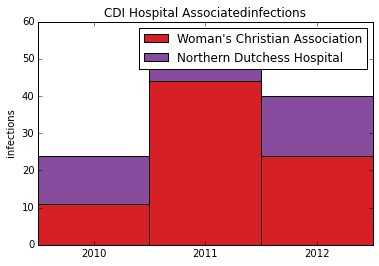

In [13]:
p1=plt.bar([1,2,3], infections1['Infections observed'], 1, color=color1)
p2=plt.bar([1,2,3], infections2['Infections observed'], 1, color=color2, bottom=infections1['Infections observed'])

plt.ylabel('infections')
plt.title(indicator+'infections')
plt.xticks([1.5,2.5,3.5],('2010', '2011', '2012') )
plt.legend( (p1[0], p2[0]), (hospital1, hospital2) )

To visualize relative changes we can normalize the data and plot a stacked 100% area chart.  The first step is to convert the panda dataframe column to an array so we can perform math operations on it using numpy.

In [14]:
array1=np.array(infections1['Infections observed'].tolist())
array2=np.array(infections2['Infections observed'].tolist())

We want the total height of eached stacked column to be 1 (or 100%).  To achieve this we divide each array by the sum of both arrays.  Afterwards we print out the arrays so we can confirm the data is correct. 

In [15]:
array1_normal=array1/(array1+array2)
array2_normal=array2/(array1+array2)

print array1_normal
print array2_normal

[ 0.45833333  0.83018868  0.6       ]
[ 0.54166667  0.16981132  0.4       ]


Now Plot the normalized data in a stacked column chart.  This gives us the stacked 100% column chart which can be used to see relative differences

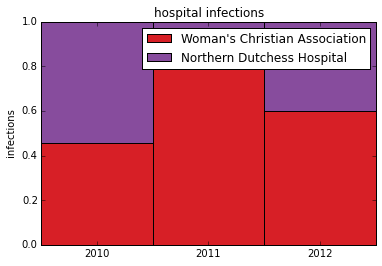

In [16]:
p1=plt.bar([1,2,3], array1_normal, 1, color=color1)
p2=plt.bar([1,2,3], array2_normal, 1, color=color2, bottom=array1_normal)

plt.ylabel('infections')
plt.title('hospital infections')
plt.xticks([1.5,2.5,3.5],('2010', '2011', '2012') )
#plt.yticks(np.arange(0,81,10))
plt.legend( (p1[0], p2[0]), (hospital1, hospital2) )